In [79]:
import pandas as pd
import numpy as np

In [53]:
import urllib.request

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
urllib.request.urlretrieve(url, "car_fuel_efficiency.csv")


('car_fuel_efficiency.csv', <http.client.HTTPMessage at 0x2cd6c5e7710>)

In [54]:
#Read the data 
df=pd.read_csv("car_fuel_efficiency.csv")
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [55]:
df.drop(columns=['num_cylinders', 'acceleration',  'origin', 'fuel_type', 'drivetrain',
       'num_doors'],inplace=True)


In [95]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [56]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [57]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The answer is :hospower

Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [58]:
df["horsepower"].describe().T

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

The median is:149

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [59]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_test-n_val

In [72]:
n

9704

In [71]:
n_val,n_test,n_train

(1940, 1940, 5824)

In [75]:
df_val=df.iloc[:n_val]
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
1935,160,129.0,3157.084047,2010,14.287757
1936,200,120.0,2409.805200,2023,17.291549
1937,190,NaN,2953.047520,2002,15.468923
1938,210,168.0,3147.907270,2005,14.315125


In [76]:
df_test=df.iloc[n_val:n_val+n_test]
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1940,210,171.0,3399.802053,2020,12.943405
1941,190,130.0,2842.855987,2021,15.586501
1942,210,138.0,2876.923407,2001,14.587988
1943,250,150.0,3348.714813,2014,12.905452
1944,130,151.0,2479.816512,2009,17.475198
...,...,...,...,...,...
3875,150,136.0,3444.340325,2013,12.598943
3876,220,140.0,2851.154376,2022,15.326562
3877,280,159.0,2685.290184,2019,16.533434
3878,210,171.0,2292.068301,2019,18.705670


In [67]:
df_test=df.iloc[n_val:n_val+n_test]

In [68]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1940,210,171.0,3399.802053,2020,12.943405
1941,190,130.0,2842.855987,2021,15.586501
1942,210,138.0,2876.923407,2001,14.587988
1943,250,150.0,3348.714813,2014,12.905452
1944,130,151.0,2479.816512,2009,17.475198
...,...,...,...,...,...
3875,150,136.0,3444.340325,2013,12.598943
3876,220,140.0,2851.154376,2022,15.326562
3877,280,159.0,2685.290184,2019,16.533434
3878,210,171.0,2292.068301,2019,18.705670


In [73]:
df_train=df.iloc[n_val+n_test:]

In [74]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3880,180,119.0,3582.745396,2012,11.345737
3881,240,152.0,2892.395450,2019,15.994232
3882,290,152.0,3515.849661,2003,12.600823
3883,170,121.0,2931.819348,2012,14.816853
3884,210,147.0,2614.520645,2008,16.126712
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [233]:
#shuffle the datta
idx=np.arange(n)
idx
np.random.seed(42)
np.random.shuffle(idx)
df_train=df.iloc[idx[n_train:]]
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [234]:
df_train=df.iloc[idx[n_train:]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df_val

In [235]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [236]:
y_train=df_train['fuel_efficiency_mpg'].values
y_test=df_test['fuel_efficiency_mpg'].values
y_val=df_val['fuel_efficiency_mpg'].values

In [237]:
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [238]:
def linear_regression(X,y):
    pass


In [239]:
X=[[134,23,34],[12,50,65],[3,10,13]]
X=np.array(X)
XTX=X.T.dot(X)

In [240]:
X.shape

(3, 3)

In [241]:
XTX_inv=np.linalg.inv(XTX)

In [242]:
y=[12,120,150]
w=XTX_inv@y

In [243]:
ones=np.ones(X.shape[0])
ones
X=np.column_stack([ones,X])
XTX=X.T.dot(X)
XTX_inv=np.linalg.inv(XTX)

y=[12,120,150]
w_full = XTX_inv.dot(X.T).dot(y)

In [244]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0]) 
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

Option one with missing valeus equal to ZERO

In [245]:
df_train.columns
base=['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
X_train=df_train[base].fillna(0).values
wo,w= train_linear_regression(X_train,y_train)

In [246]:
wo,w

(25.764258461110757,
 array([ 3.60622916e-05,  3.69826771e-03, -5.01362264e-03,  1.86542140e-03]))

In [247]:
y_pred=wo+X_train.dot(w)
y_pred


array([16.05467105, 14.94451055, 11.88870001, ..., 17.99679204,
       20.66456287, 16.98491659])

<Axes: ylabel='Count'>

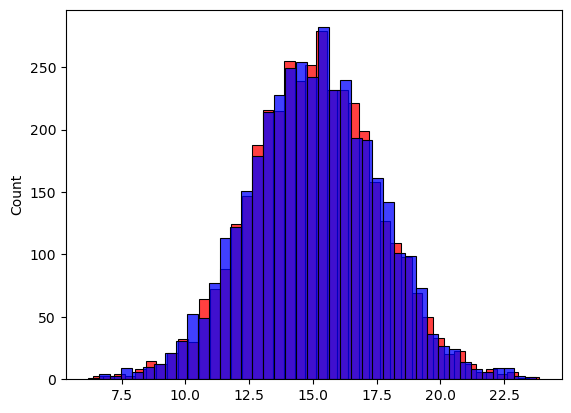

In [248]:
import seaborn as sns 
sns.histplot(y_pred,color='red')
sns.histplot(y_train,color='blue')

Option two whit missing values equal to the mmean of the training set

In [251]:
mean=df_train[base].mean()
X_train_mean=df_train[base].fillna(mean).values
wo,w= train_linear_regression(X_train_mean,y_train)
y_pred_mean=wo+X_train_mean.dot(w)
y_pred_mean

array([15.76848093, 14.8333584 , 12.02894173, ..., 18.20396406,
       20.50388987, 16.93731165])

<Axes: ylabel='Count'>

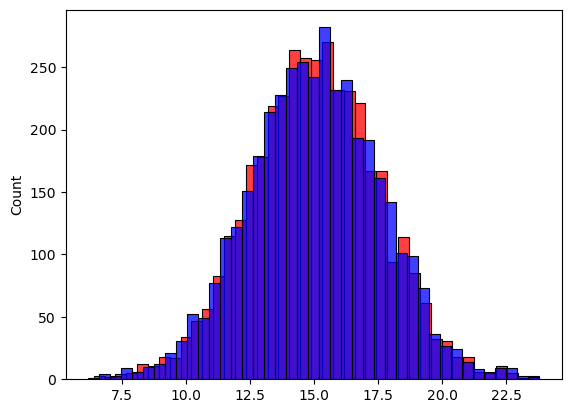

In [252]:
import seaborn as sns 
sns.histplot(y_pred_mean,color='red')
sns.histplot(y_train,color='blue')